In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Proyectos personales/End to end telco churn project/Telco_Customer_Churn.csv' # Replace with your actual file path
try:
  df = pd.read_csv(file_path)
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
df.shape

(7043, 21)

In [8]:
df.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  

[1 rows x 21 columns]

In [9]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [10]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   object 
 10  Churn                                  7043 non-null   int64  
 11  Mult

In [11]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
count          7043          7043            7043           7043         7043   
unique            2             3               3              3            3   
top             Yes            No     Fiber optic             No           No   
freq           6361          3390            3096           3498         3088   
mean            NaN           NaN             NaN            NaN          NaN   
std             NaN           NaN             NaN            NaN          NaN   
min             NaN           NaN             NaN            NaN          NaN   
25%             NaN           NaN             NaN            NaN          NaN   
50%             NaN           NaN             NaN            NaN          NaN   
75%             NaN           NaN             NaN            NaN          NaN   
max             NaN           NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7043             7043              7043     7043.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4171              2365             NaN   
mean               NaN              NaN               NaN       64.761692   
std                NaN              NaN               NaN       30.090047   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.500000   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.850000   
max                NaN              NaN               NaN      118.750000   

       TotalCharges Churn  
count          7043  7043  
unique         6531     2  
top                    No  
freq             11  5174  
mean            NaN   NaN  
std             NaN   NaN  
min             NaN   NaN  
25%             NaN   NaN  
50%             NaN   NaN  
75%             NaN   NaN  
max             NaN   NaN


based on the .describe (and exploration) we can see that most categorical variables have between 2, 3, or 4 categories
So for those that only have 2 (binary) let's just replace by 0 and 1
For those that have 3 or 4 we can do One-Hot encoding
---



In [12]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})

/tmp/ipython-input-2830485926.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [13]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0             0  No phone service             DSL             No          Yes   
1             1                No             DSL            Yes           No   
2             1                No             DSL            Yes          Yes   
3             0  No phone service             DSL            Yes           No   
4             1                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 1           Electronic check           29.85        29.85   
1                 0               Mailed check           56.95       1889.5   
2                 1               Mailed check           53.85       108.15   
3                 0  Bank transfer (automatic)           42.30      1840.75   
4                 1           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [14]:
# Categorical columns with > 2 unique values
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# One-hot encode
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [15]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  Churn  \
0             0                 1           29.85        29.85      0   
1             1                 0           56.95       1889.5      0   
2             1                 1           53.85       108.15      1   
3             0                 0           42.30      1840.75      0   
4             1                 1           70.70       151.65      1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                            True              False   
1                           False              False   
2                           False              False   
3                            True              False   
4                           False              False   

   InternetService_Fiber optic  InternetService_No  \
0                        False               False   
1                        False               False   
2                        False               False   
3                        False               False   
4                         True               False   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               False               False   
1                               False                True   
2                               False                True   
3                               False                True   
4                               False               False   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False             False   
2                             False              True   
3                             False             False   
4                             False             False   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                 False                 False   
1                                 False                  True   
2                                 False                 False   
3                                 False                  True   
4                                 False                 False   

   TechSupport_No internet service  TechSupport_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False            False   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False            False   
4                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  \
0              False              False   
1               True              False   
2              False              False   
3               True              False   
4              False              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0         

TURN TOTAL CHARGES FROM OBJECT TO NUMERICAL AND TURN UNCONVERTABLE VALUES TO NAN

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


DROP COLUMNS NOT NEEDED

In [18]:
df = df.drop('customerID', axis=1)

SELECT ALL BOOLEAN COLUMNS AND CONVERT TO INTEGER , FROM TRUE OR FALSE TO 1 AND 0

In [19]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [21]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


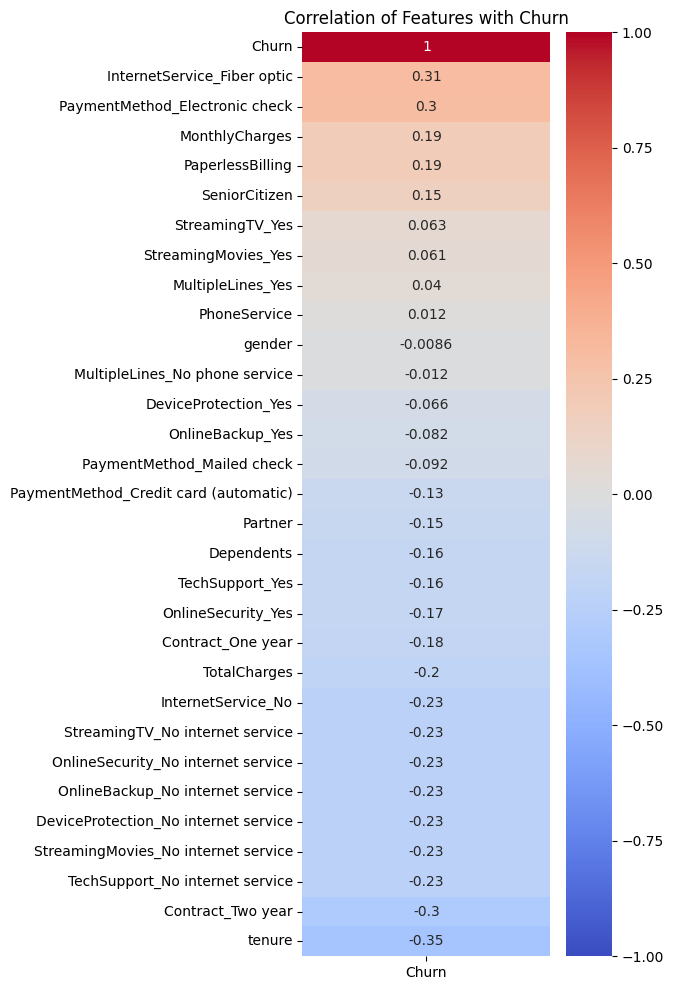

In [22]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Look for multicolinearity (VIF)

In [23]:
# We need to collapse redundant columns before running VIF
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])
# Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

El VIF mide cuánto una variable está correlacionada con las demás.

Un VIF = 1 → no hay correlación (ideal)

Un VIF entre 1 y 5 → correlación moderada (aceptable)

Un VIF > 10 → alta multicolinealidad (deberías considerar eliminar esa variable)

Clearly we can see there's multicolinearity between features
So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
Or use tree based models which are less sensitive to multicollinearity
In decision trees, splits are based on feature importance for reducing impurity — redundant features just compete, but won’t cause unstable predictions.

***Machine learning IMPLEMENTATION***

WE HAVE TO ANALYZE IF THERE IS ANY CLASS IMBALANCE PROBLEM

In [24]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important — here’s why:

1️⃣ Business context Churn prediction is asymmetric in cost:

False Negative (FN): You predict a customer will not churn, but they actually leave → you miss the chance to intervene and keep them.

False Positive (FP): You predict a customer will churn, but they stay → you might spend some retention resources unnecessarily.

Missing churners (FN) usually costs more than wrongly targeting a loyal customer.

Typical priority

If retention campaigns are cheap → prioritize recall (catch every possible churner).
If retention campaigns are expensive → balance precision and recall using F1 score or a precision-recall trade-off.
If business wants a ranking of churn risk → use ROC-AUC or PR-AUC to evaluate the model.

Why Recall Matters Most in Churn Prediction

In customer churn prediction, recall (and metrics based on it, like the F1 score) is often the most important performance metric.
Here’s why:

🧩 1️⃣ Business Context: Churn prediction has asymmetric costs

The two main types of model errors don’t cost the business equally:

False Negative (FN):
You predict that a customer won’t churn, but they actually do leave.
→ You lose the customer and miss the chance to take preventive action (e.g., offer a discount or special deal).

False Positive (FP):
You predict that a customer will churn, but they actually stay.
→ You might waste some resources on retention efforts for someone who didn’t need them.

👉 In most businesses, False Negatives are more costly than False Positives — because losing a customer typically costs more than offering a retention incentive to a loyal one.

🧭 Typical Priorities

If retention campaigns are cheap:
Focus on recall — you want to catch every possible churner, even if that means targeting some customers unnecessarily.

If retention campaigns are expensive:
Balance precision and recall using the F1 score or by analyzing the precision-recall trade-off to find an optimal balance.

If the business needs a churn-risk ranking rather than strict yes/no predictions:
Use ROC-AUC or PR-AUC (Precision-Recall AUC) to evaluate how well the model ranks customers by their likelihood of churning.

Key Accuracy Metrics
1. Accuracy
Accuracy is the most intuitive metric. It represents the proportion of total predictions (both churn and non-churn) that the model got right.

Accuracy=
Total Number of Predictions
Number of Correct Predictions
​
 =
True Positives+True Negatives+False Positives+False Negatives
True Positives+True Negatives
​

Pro: Easy to understand and interpret.

Con: Can be misleading, especially when the dataset is imbalanced (e.g., only 5% of customers churn). A model that always predicts "no churn" could still have 95% accuracy, but it would be useless for identifying at-risk customers.

2. Precision
Precision (also called Positive Predictive Value) answers the question: "Of all the customers the model predicted would churn, how many actually did?"

Precision=
True Positives+False Positives
True Positives
​

True Positive (TP): The model correctly predicted churn.

False Positive (FP): The model incorrectly predicted churn (these are "false alarms").

Use Case: High precision is important if the cost of false alarms (e.g., wasting resources on retention efforts for customers who would have stayed anyway) is high.

3. Recall
Recall (also called Sensitivity or True Positive Rate) answers the question: "Of all the customers who actually churned, how many did the model correctly identify?"

Recall=
True Positives+False Negatives
True Positives
​

False Negative (FN): The model incorrectly predicted no churn for a customer who actually did churn (these are missed opportunities).

Use Case: High recall is critical in churn modeling because the cost of a False Negative (losing a valuable customer) is often very high. A high-recall model ensures you don't miss many customers who are about to leave.

4. F1-Score
The F1-Score is the harmonic mean of Precision and Recall. It provides a single score that balances both metrics.

F1-Score=2⋅
Precision+Recall
Precision⋅Recall
​

Use Case: It's a good single metric to use when you need a balance between identifying all churners (Recall) and ensuring that the customers you target for retention are true churn risks (Precision).

Other Important Metrics
5. Area Under the ROC Curve (AUC-ROC)
The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) at various threshold settings.
The Area Under the Curve (AUC) measures the model's ability to distinguish between the two classes (churn vs. non-churn).

Interpretation: An AUC of 1.0 means the model is perfect. An AUC of 0.5 means the model is no better than random guessing.

Use Case: AUC is threshold-independent, meaning it evaluates the model's performance across all possible cutoff points. It's often considered the best single metric for overall model quality, especially with imbalanced data.

6. Log Loss (Binary Cross-Entropy)
Log Loss is a measure of the uncertainty of the model's predictions. Instead of just looking at the final classification (churn/no churn), it considers the probability the model assigned. A small Log Loss indicates high confidence in the correct predictions and high penalty for incorrect, confident predictions.

Use Case: It's particularly useful when the output needs to be a well-calibrated probability (e.g., "This customer has an 85% chance of churning"), which is crucial for determining how much resource to allocate to a retention effort.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.770     0.824      1035
           1      0.532     0.725     0.614       374

    accuracy                          0.758      1409
   macro avg      0.709     0.747     0.719      1409
weighted avg      0.792     0.758     0.768      1409



In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


LightGBM classifier

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 1.49 seconds
⏱ Prediction time: 0.0396 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 2.72 seconds
⏱ Prediction time: 0.0391 seconds
              precision    recall  f1-score   support

           0      0.907     0.700     0.791      1035
           1      0.492     0.802     0.610       374

    accuracy                          0.727      1409
   macro avg      0.700     0.751     0.700      1409
weighted avg      0.797     0.727     0.743      1409



In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.468   0.829   0.598   
0.3     0.492   0.802   0.610   
0.35    0.511   0.791   0.621   
0.4     0.524   0.765   0.622   
0.45    0.535   0.722   0.614   
0.5     0.549   0.698   0.615   


Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [33]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.9 MB/s eta 0:00:00


In [34]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-10-07 23:38:12,645] A new study created in memory with name: no-name-2b722277-cc66-41f2-9e7c-be0ca02c6b4a
[I 2025-10-07 23:38:20,743] Trial 0 finished with value: 0.8636363636363636 and parameters: {'n_estimators': 670, 'learning_rate': 0.08055221710573565, 'max_depth': 7, 'subsample': 0.7861301700652583, 'colsample_bytree': 0.9988461095257533, 'min_child_weight': 2, 'gamma': 2.1695444440540794, 'reg_alpha': 2.1730694655679805, 'reg_lambda': 2.333272761059062}. Best is trial 0 with value: 0.8636363636363636.
[I 2025-10-07 23:38:21,617] Trial 1 finished with value: 0.9144385026737968 and parameters: {'n_estimators': 359, 'learning_rate': 0.038169637088369394, 'max_depth': 4, 'subsample': 0.602756432721743, 'colsample_bytree': 0.5881380910318521, 'min_child_weight': 3, 'gamma': 4.528135136561996, 'reg_alpha': 3.4776994701241963, 'reg_lambda': 4.117230451719553}. Best is trial 1 with value: 0.9144385026737968.
[I 2025-10-07 23:38:22,988] Trial 2 finished with value: 0.903743315508

Best Params: {'n_estimators': 714, 'learning_rate': 0.01180708249569897, 'max_depth': 10, 'subsample': 0.9968868688486403, 'colsample_bytree': 0.7275723892513882, 'min_child_weight': 6, 'gamma': 3.764657644073899, 'reg_alpha': 4.883895621443305, 'reg_lambda': 4.691052445419144}
Best Recall: 0.9251336898395722


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 5.50 seconds
⏱ Prediction time: 0.0187 seconds
              precision    recall  f1-score   support

           0      0.954     0.567     0.712      1035
           1      0.436     0.925     0.592       374

    accuracy                          0.662      1409
   macro avg      0.695     0.746     0.652      1409
weighted avg      0.817     0.662     0.680      1409



In [38]:
pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/

In [39]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

2025/10/07 23:41:07 INFO mlflow.tracking.fluent: Experiment with name 'Telco Churn - XGBoost' does not exist. Creating a new experiment.
2025/10/07 23:41:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1028: UserWarning: [23:41:16] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/10/07 23:41:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.954     0.567     0.712      1035
           1      0.436     0.925     0.592       374

    accuracy                          0.662      1409
   macro avg      0.695     0.746     0.652      1409
weighted avg      0.817     0.662     0.680      1409



MLflow is an open-source platform designed to manage the entire machine learning lifecycle, from experimentation to production deployment. Its core purpose is to make the process of developing, training, tracking, packaging, and deploying models more manageable, traceable, and reproducible for individuals and teams.


It is often considered a key tool within the MLOps (Machine Learning Operations) framework.

Key Components of MLflow 🛠️
MLflow is organized into four primary, interoperable components:

1. MLflow Tracking:

An API and UI for logging and comparing machine learning experiments and runs.

It records parameters (hyperparameters), metrics (accuracy, loss), code versions, and artifacts (model files, plots).

This allows users to easily visualize, search, and compare results to determine the best model configuration.

2. MLflow Projects:

A standardized format for packaging data science code into reusable and reproducible projects.

A project is typically a directory or Git repository with an MLproject file that specifies entry points, parameters, and environment dependencies (like a conda.yaml file).

This ensures that any team member can reproduce a run with the exact same dependencies and code.

3. MLflow Models:

A convention for saving machine learning models in a standardized format (called "flavors," e.g., Python function, TensorFlow, PyTorch).

This format ensures that a model can be used and deployed across various downstream tools, serving platforms, and cloud environments (like Azure ML or AWS SageMaker).

4. MLflow Model Registry:

A centralized repository to collaboratively manage the full lifecycle of an MLflow Model.

It provides model versioning, tracks model lineage (which run produced the model), and manages stage transitions (e.g., transitioning a model from "Staging" to "Production" or "Archived").

By integrating these components, MLflow helps streamline the transition of a machine learning model from a research notebook to a reliable production system.